In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
#Lets read temperature file to create the DF
file_temp = "weather_data/temperature.csv"
temp_df = pd.read_csv(file_temp, encoding="ISO-8859-1")
temp_df_city = temp_df[['datetime','Los Angeles','Chicago','Vancouver','Philadelphia','New York']]
temp_df_city_2015 = temp_df_city[temp_df_city['datetime'].str.contains('2015')]

#Remove the NAN. Since we have lot of data we can just drop any values
temp_df_city_2015 = temp_df_city_2015.dropna(how="any")
temp_df_city_2015.head()

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York
19716,2015-01-01 00:00:00,276.988500,266.138500,274.700,268.851000,268.050
19717,2015-01-01 01:00:00,277.518333,266.418333,274.586,267.801667,268.050
19718,2015-01-01 02:00:00,276.311667,266.936667,274.586,267.278333,267.186
19719,2015-01-01 03:00:00,274.348000,266.535500,274.586,267.485500,267.186
19720,2015-01-01 04:00:00,273.393667,267.360333,274.586,266.718667,267.186


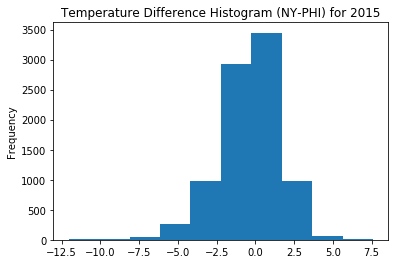

In [3]:
temp_df_city_2015['Temp Diff (NY-PHI)'] = temp_df_city_2015['New York'] - temp_df_city_2015['Philadelphia']
temp_df_city_2015['Temp Diff (NY-PHI)'].plot(kind='hist', title= 'Temperature Difference Histogram (NY-PHI) for 2015')

#Again, this saves the plot as a png file
plt.savefig('temperature difference histogram.png')

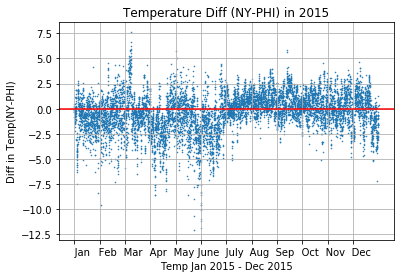

In [4]:
temp_df_city_2015 = temp_df_city_2015.reset_index(drop=True)
temp_df_city_2015.head()

plt.scatter(temp_df_city_2015.index, temp_df_city_2015['Temp Diff (NY-PHI)'], s=.3)

plt.title("Temperature Diff (NY-PHI) in 2015")
plt.xlabel("Temp Jan 2015 - Dec 2015")
plt.ylabel("Diff in Temp(NY-PHI)")
plt.axhline(0, color='red')


labels = ['     Jan', '     Feb', '     Mar', '     Apr', '     May', '     June',
          '     July', '     Aug', '     Sep', '     Oct', '     Nov', '     Dec']
plt.xticks(np.arange(0,8760, 730), labels, rotation=0)
plt.grid()
plt.savefig('temp diff scatter.png')

In [5]:
# Paired T-Test
stats.ttest_rel(temp_df_city_2015['Philadelphia'], temp_df_city_2015['New York'])

Ttest_relResult(statistic=17.43683640562947, pvalue=5.8121320949873825e-67)

In [6]:
temp_df_city_2015 = temp_df_city_2015.reset_index(drop=True)
temp_df_city_2015.head()

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI)
0,2015-01-01 00:00:00,276.988500,266.138500,274.700,268.851000,268.050,-0.801000
1,2015-01-01 01:00:00,277.518333,266.418333,274.586,267.801667,268.050,0.248333
2,2015-01-01 02:00:00,276.311667,266.936667,274.586,267.278333,267.186,-0.092333
3,2015-01-01 03:00:00,274.348000,266.535500,274.586,267.485500,267.186,-0.299500
4,2015-01-01 04:00:00,273.393667,267.360333,274.586,266.718667,267.186,0.467333


In [7]:
temp_df_city_2015[['Year','Month','Ext']] = temp_df_city_2015['datetime'].str.split('-', expand=True)
temp_df_city_2015[['Day','Time']] = temp_df_city_2015['Ext'].str.split(' ', expand=True)
temp_df_city_2015 = temp_df_city_2015.drop(['Ext'], axis=1)
temp_df_city_2015.head()

,datetime,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI),Year,Month,Day,Time
0,2015-01-01 00:00:00,276.988500,266.138500,274.700,268.851000,268.050,-0.801000,2015,01,01,00:00:00
1,2015-01-01 01:00:00,277.518333,266.418333,274.586,267.801667,268.050,0.248333,2015,01,01,01:00:00
2,2015-01-01 02:00:00,276.311667,266.936667,274.586,267.278333,267.186,-0.092333,2015,01,01,02:00:00
3,2015-01-01 03:00:00,274.348000,266.535500,274.586,267.485500,267.186,-0.299500,2015,01,01,03:00:00
4,2015-01-01 04:00:00,273.393667,267.360333,274.586,266.718667,267.186,0.467333,2015,01,01,04:00:00


In [8]:
temp_df_city_2015_month = temp_df_city_2015.groupby(['Month'])
temp_df_city_2015_month_avg = temp_df_city_2015_month.mean()
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI)
Month,,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405,-0.919913
02,284.738212,262.712147,280.713602,266.595234,265.911847,-0.683386
03,287.614923,272.986255,280.855311,274.415456,274.168749,-0.246706
04,286.678284,280.327832,281.151683,284.937450,283.328344,-1.609106
05,287.691922,285.515641,287.257669,293.040608,291.882398,-1.158209
06,294.145320,289.400139,291.002764,295.178558,293.496943,-1.681615
07,296.044807,295.252852,293.402823,297.013756,297.396855,0.383099
08,297.991759,294.711922,292.117849,296.320938,297.193199,0.872261
09,297.731173,293.296431,287.135419,294.188409,294.737729,0.549320


In [9]:
#Lets read crime rate for Los Angeles
crime_file = "crime-Los Angeles/LA_CRIME_2010_2017.csv"
crime_LA = pd.read_csv(crime_file, encoding="us-ascii")
crime_LA_2015 = crime_LA[crime_LA['Date Occurred'].str.contains('2015')]
crime_LA_2015

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
200609,809,01/17/2015,01/16/2015,2130,9,Van Nuys,938,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,6200 FULTON AV,NaN,"(34.1814, -118.4263)"
200648,150108522,03/11/2015,03/11/2015,1600,1,Central,143,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,...,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,5TH,BROADWAY,"(34.0481, -118.2507)"
201228,150109432,03/24/2015,03/23/2015,1800,1,Central,185,310,BURGLARY,0344 1602,...,NaN,IC,Invest Cont,310.0,998.0,NaN,NaN,1200 MAPLE AV,NaN,"(34.0388, -118.2574)"
201249,150109804,03/29/2015,03/29/2015,800,1,Central,111,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,800 N HILL ST,NaN,"(34.0628, -118.2395)"
201589,150114304,06/08/2015,06/08/2015,1015,1,Central,144,850,INDECENT EXPOSURE,0529,...,NaN,IC,Invest Cont,850.0,NaN,NaN,NaN,400 S SPRING ST,NaN,"(34.0488, -118.2483)"
201713,150115324,06/24/2015,06/23/2015,2230,1,Central,135,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 S MAIN ST,NaN,"(34.051, -118.2445)"
201733,150116252,07/08/2015,07/06/2015,545,1,Central,127,946,OTHER MISCELLANEOUS CRIME,0443,...,VERBAL THREAT,IC,Invest Cont,946.0,NaN,NaN,NaN,JUDGE JOHN AISO,TEMPLE,"(34.0525, -118.2409)"
202598,150116299,07/08/2015,07/08/2015,2355,1,Central,153,888,TRESPASSING,1501,...,NaN,IC,Invest Cont,888.0,NaN,NaN,NaN,500 S SPRING ST,NaN,"(34.0467, -118.252)"
202856,150116489,07/11/2015,07/10/2015,2100,1,Central,192,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,1300 MARGO ST,NaN,"(34.0386, -118.2638)"
205072,150116490,07/11/2015,07/10/2015,2100,1,Central,162,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,700 S HILL ST,NaN,"(34.0462, -118.2585)"


In [10]:
crime_LA_2015[['Month','Day','Year']] = crime_LA_2015['Date Occurred'].str.split('/', expand=True)
crime_LA_2015.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Month,Day,Year
200609,809,01/17/2015,01/16/2015,2130,9,Van Nuys,938,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,6200 FULTON AV,NaN,"(34.1814, -118.4263)",01,16,2015
200648,150108522,03/11/2015,03/11/2015,1600,1,Central,143,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,...,442.0,NaN,NaN,NaN,5TH,BROADWAY,"(34.0481, -118.2507)",03,11,2015
201228,150109432,03/24/2015,03/23/2015,1800,1,Central,185,310,BURGLARY,0344 1602,...,310.0,998.0,NaN,NaN,1200 MAPLE AV,NaN,"(34.0388, -118.2574)",03,23,2015
201249,150109804,03/29/2015,03/29/2015,800,1,Central,111,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,800 N HILL ST,NaN,"(34.0628, -118.2395)",03,29,2015
201589,150114304,06/08/2015,06/08/2015,1015,1,Central,144,850,INDECENT EXPOSURE,0529,...,850.0,NaN,NaN,NaN,400 S SPRING ST,NaN,"(34.0488, -118.2483)",06,08,2015


In [11]:
crime_LA_2015_month = crime_LA_2015.groupby('Month')
crime_LA_2015_month_count_df = crime_LA_2015_month.count()
crime_LA_2015_month_count_df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Day,Year
Month,,,,,,,,,,,,,,,,,,,,,
01,17981,17981,17981,17981,17981,17981,17981,17981,17977,16073,...,17981,17981,1144,33,2,17981,2847,17981,17981,17981
02,15930,15930,15930,15930,15930,15930,15930,15930,15928,14287,...,15930,15930,1035,37,2,15930,2586,15930,15930,15930
03,17907,17907,17907,17907,17907,17907,17907,17907,17900,16149,...,17907,17907,1264,38,2,17907,2895,17907,17907,17907
04,16869,16869,16869,16869,16869,16869,16869,16869,16868,15275,...,16869,16869,1138,45,3,16869,2727,16869,16869,16869
05,17839,17839,17839,17839,17839,17839,17839,17839,17837,16083,...,17839,17839,1237,30,0,17839,2904,17839,17839,17839
06,17423,17423,17423,17423,17423,17423,17423,17423,17423,15767,...,17423,17423,1203,33,0,17423,2910,17423,17423,17423
07,18553,18553,18553,18553,18553,18553,18553,18553,18550,16679,...,18553,18553,1257,29,0,18553,3060,18553,18553,18553
08,18877,18877,18877,18877,18877,18877,18877,18877,18873,16873,...,18877,18876,1259,31,1,18877,3164,18877,18877,18877
09,18152,18152,18152,18152,18152,18152,18152,18152,18151,16275,...,18152,18152,1233,31,0,18152,3078,18152,18152,18152


In [12]:
temp_df_city_2015_month_avg['Crime Los Angeles'] = crime_LA_2015_month_count_df['Date Occurred']
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI),Crime Los Angeles
Month,,,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405,-0.919913,17981
02,284.738212,262.712147,280.713602,266.595234,265.911847,-0.683386,15930
03,287.614923,272.986255,280.855311,274.415456,274.168749,-0.246706,17907
04,286.678284,280.327832,281.151683,284.937450,283.328344,-1.609106,16869
05,287.691922,285.515641,287.257669,293.040608,291.882398,-1.158209,17839
06,294.145320,289.400139,291.002764,295.178558,293.496943,-1.681615,17423
07,296.044807,295.252852,293.402823,297.013756,297.396855,0.383099,18553
08,297.991759,294.711922,292.117849,296.320938,297.193199,0.872261,18877
09,297.731173,293.296431,287.135419,294.188409,294.737729,0.549320,18152


In [13]:
#Lets read crime rate for Chicago
crime_file = "crime-Chicago/CHI_CRIME_2012_2017.csv"
crime_CHI = pd.read_csv(crime_file, encoding="us-ascii")

crime_CHI_2015 = crime_CHI[crime_CHI['Date'].str.contains('2015')]
crime_CHI_2015

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
154,36509,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,...,7.0,43.0,02,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
157,37451,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,27.0,06,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
190,46637,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,44.0,6.0,08A,1169640.0,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)"
191,46745,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,36.0,19.0,02,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)"
744,207345,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,45.0,11.0,18,1135867.0,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)"
745,207432,10181647,HY215976,04/09/2015 04:30:51 PM,061XX S CHAMPLAIN AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENCE,True,...,20.0,42.0,18,1181623.0,1864501.0,2015,05/12/2016 03:48:29 PM,41.783424,-87.609648,"(41.783424215, -87.609648327)"
746,207605,10192026,HY360910,07/29/2015 04:21:21 PM,029XX W FLOURNOY ST,2027,NARCOTICS,POSS: CRACK,APARTMENT,True,...,2.0,27.0,18,1156974.0,1896894.0,2015,05/12/2016 03:48:29 PM,41.872848,-87.699144,"(41.872848316, -87.69914356)"
747,207671,10203133,HY381916,08/14/2015 10:55:00 AM,054XX W WALTON ST,1821,NARCOTICS,MANU/DEL:CANNABIS 10GM OR LESS,VEHICLE NON-COMMERCIAL,True,...,37.0,25.0,18,1139924.0,1905802.0,2015,05/12/2016 03:48:29 PM,41.897622,-87.761525,"(41.897621617, -87.761524853)"
748,207803,10211492,HY257237,05/12/2015 11:54:19 AM,066XX S WASHTENAW AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,15.0,66.0,18,1159517.0,1860604.0,2015,05/12/2016 03:48:29 PM,41.773212,-87.690803,"(41.773212262, -87.690803401)"
750,208172,10211589,HY340025,07/14/2015 06:00:00 AM,033XX W FILLMORE ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,POLICE FACILITY/VEH PARKING LOT,True,...,24.0,29.0,18,1154228.0,1895173.0,2015,05/12/2016 03:48:29 PM,41.868181,-87.709271,"(41.868180939, -87.709271389)"


In [14]:
crime_CHI_2015[['Month','Day','Ext']] = crime_CHI_2015['Date'].str.split('/', expand=True)
crime_CHI_2015[['Year','Time']] = crime_CHI_2015['Ext'].str.split(' ', 1, expand=True)
crime_CHI_2015 = crime_CHI_2015.drop(['Ext'], axis=1)

crime_CHI_2015.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Time
154,36509,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,...,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,01,01,12:00:00 AM
157,37451,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,11,24,05:30:00 PM
190,46637,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,...,1169640.0,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)",05,19,01:12:00 AM
191,46745,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)",01,01,12:00:00 AM
744,207345,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,...,1135867.0,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)",06,24,06:00:00 AM


In [15]:
crime_CHI_2015_month = crime_CHI_2015.groupby('Month')
crime_CHI_2015_month_count_df = crime_CHI_2015_month.count()
crime_CHI_2015_month_count_df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Time
Month,,,,,,,,,,,,,,,,,,,,,
01,20656,20656,20656,20656,20656,20656,20656,20656,20639,20656,...,20656,20309,20309,20656,20656,20309,20309,20309,20656,20656
02,16287,16287,16287,16287,16287,16287,16287,16287,16267,16287,...,16287,16079,16079,16287,16287,16079,16079,16079,16287,16287
03,21560,21560,21560,21560,21560,21560,21560,21560,21530,21560,...,21560,21271,21271,21560,21560,21271,21271,21271,21560,21560
04,21610,21610,21610,21610,21610,21610,21610,21610,21594,21610,...,21610,21467,21467,21610,21610,21467,21467,21467,21610,21610
05,23570,23570,23570,23570,23570,23570,23570,23570,23560,23570,...,23570,23355,23355,23570,23570,23355,23355,23355,23570,23570
06,23059,23059,23059,23059,23059,23059,23059,23059,23044,23059,...,23059,22930,22930,23059,23059,22930,22930,22930,23059,23059
07,24101,24101,24101,24101,24101,24101,24101,24101,24086,24101,...,24101,23915,23915,24101,24101,23915,23915,23915,24101,24101
08,24685,24685,24685,24685,24685,24685,24685,24685,24667,24685,...,24685,24472,24472,24685,24685,24472,24472,24472,24685,24685
09,22996,22996,22996,22996,22996,22996,22996,22996,22979,22996,...,22996,22716,22716,22996,22996,22716,22716,22716,22996,22996


In [16]:
temp_df_city_2015_month_avg['Crime Chicago'] = crime_CHI_2015_month_count_df['Date']
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI),Crime Los Angeles,Crime Chicago
Month,,,,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405,-0.919913,17981,20656
02,284.738212,262.712147,280.713602,266.595234,265.911847,-0.683386,15930,16287
03,287.614923,272.986255,280.855311,274.415456,274.168749,-0.246706,17907,21560
04,286.678284,280.327832,281.151683,284.937450,283.328344,-1.609106,16869,21610
05,287.691922,285.515641,287.257669,293.040608,291.882398,-1.158209,17839,23570
06,294.145320,289.400139,291.002764,295.178558,293.496943,-1.681615,17423,23059
07,296.044807,295.252852,293.402823,297.013756,297.396855,0.383099,18553,24101
08,297.991759,294.711922,292.117849,296.320938,297.193199,0.872261,18877,24685
09,297.731173,293.296431,287.135419,294.188409,294.737729,0.549320,18152,22996


In [17]:
#Lets read crime rate for New York
crime_file = "crime-New York/NYPD_Complaint_Data_Historic.csv"
crime_NYC = pd.read_csv(crime_file, encoding="us-ascii")

crime_NYC_2015 = crime_NYC[crime_NYC['RPT_DT'].str.contains('2015')]
crime_NYC_2015.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [18]:
crime_NYC_2015[['Month','Day','Year']] = crime_NYC_2015['RPT_DT'].str.split('/', expand=True)
crime_NYC_2015.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,Month,Day,Year
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",12,31,2015
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",12,31,2015
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",12,31,2015
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",12,31,2015
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",12,31,2015


In [19]:
crime_NYC_2015['Month'] = crime_NYC_2015['Month'].astype(str).str.zfill(2)
crime_NYC_2015_month = crime_NYC_2015.groupby('Month')
crime_NYC_2015_month_count_df = crime_NYC_2015_month.count()
crime_NYC_2015_month_count_df

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,Day,Year
Month,,,,,,,,,,,,,,,,,,,,,
01,34533,34531,34533,27864,27875,34533,34533,34459,34493,34493,...,34398,129,1825,33151,33151,33151,33151,33151,34533,34533
02,31540,31538,31540,25246,25259,31540,31540,31455,31522,31522,...,31396,76,1683,30320,30320,30320,30320,30320,31540,31540
03,38023,38020,38023,30592,30601,38023,38023,37921,37996,37996,...,37821,170,1987,36501,36501,36501,36501,36501,38023,38023
04,39846,39845,39846,32004,32015,39846,39846,39723,39821,39821,...,39632,354,1881,39107,39107,39107,39107,39107,39846,39846
05,42321,42318,42321,33953,33966,42321,42321,42171,42285,42285,...,42131,499,2098,41704,41704,41704,41704,41704,42321,42321
06,41662,41658,41662,33401,33418,41662,41662,41525,41636,41636,...,41505,492,2051,41034,41034,41034,41034,41034,41662,41662
07,44379,44377,44379,35540,35552,44379,44379,44260,44348,44348,...,44224,673,2120,43679,43679,43679,43679,43679,44379,44379
08,45096,45094,45096,36705,36726,45096,45096,44967,45061,45061,...,44933,749,2284,44379,44379,44379,44379,44379,45096,45096
09,41942,41940,41942,33961,33976,41942,41942,41828,41908,41908,...,41726,520,2175,41300,41300,41300,41300,41300,41942,41942


In [20]:
temp_df_city_2015_month_avg['Crime New York'] = crime_NYC_2015_month_count_df['RPT_DT']
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI),Crime Los Angeles,Crime Chicago,Crime New York
Month,,,,,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405,-0.919913,17981,20656,34533
02,284.738212,262.712147,280.713602,266.595234,265.911847,-0.683386,15930,16287,31540
03,287.614923,272.986255,280.855311,274.415456,274.168749,-0.246706,17907,21560,38023
04,286.678284,280.327832,281.151683,284.937450,283.328344,-1.609106,16869,21610,39846
05,287.691922,285.515641,287.257669,293.040608,291.882398,-1.158209,17839,23570,42321
06,294.145320,289.400139,291.002764,295.178558,293.496943,-1.681615,17423,23059,41662
07,296.044807,295.252852,293.402823,297.013756,297.396855,0.383099,18553,24101,44379
08,297.991759,294.711922,292.117849,296.320938,297.193199,0.872261,18877,24685,45096
09,297.731173,293.296431,287.135419,294.188409,294.737729,0.549320,18152,22996,41942


In [21]:
#Lets read crime rate for Philadelphia
crime_file = "crime-Philadelphia/crime.csv"
crime_PHI = pd.read_csv(crime_file, encoding="us-ascii")

crime_PHI_2015 = crime_PHI[crime_PHI['Dispatch_Date'].str.contains('2015')]
crime_PHI_2015

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
5,17,1,2015-04-25 12:50:00,2015-04-25,12:50:00,12,201517017705,800 BLOCK S BROAD ST,600.0,Thefts,13.0,2015-04,-75.166412,39.940070
12,22,3,2015-10-06 18:18:00,2015-10-06,18:18:00,18,201522089374,1500 BLOCK N 15TH ST,600.0,Thefts,16.0,2015-10,-75.160229,39.976134
13,22,3,2015-10-09 00:49:00,2015-10-09,00:49:00,0,201522090172,1500 BLOCK N 17TH ST,600.0,Thefts,16.0,2015-10,-75.163073,39.977872
14,77,A,2015-05-03 20:39:00,2015-05-03,20:39:00,20,201577002447,GATE C-18,600.0,Thefts,NaN,2015-05,NaN,NaN
15,2,1,2015-11-30 08:39:00,2015-11-30,08:39:00,8,201502076521,6500 BLOCK CASTOR AV,600.0,Thefts,2.0,2015-11,-75.075602,40.041270
18,24,2,2015-04-11 17:38:00,2015-04-11,17:38:00,17,201524030846,2800 BLOCK RUTH ST,2400.0,Disorderly Conduct,17.0,2015-04,-75.122057,39.990907
21,22,4,2015-12-10 12:29:00,2015-12-10,12:29:00,12,201522110572,2600 BLOCK W THOMPSON ST,600.0,Thefts,16.0,2015-12,-75.178874,39.975724
25,18,2,2015-05-05 03:14:00,2015-05-05,03:14:00,3,201518027600,5600 BLOCK CHESTNUT ST,600.0,Thefts,14.0,2015-05,-75.235121,39.959754
26,2,1,2015-12-08 14:42:00,2015-12-08,14:42:00,14,201502078234,4600 BLOCK E ROOSEVELT BLVD,600.0,Thefts,2.0,2015-12,-75.099584,40.028490
27,18,3,2015-10-13 19:48:00,2015-10-13,19:48:00,19,201518068761,4800 BLOCK MARKET ST,600.0,Thefts,14.0,2015-10,-75.217184,39.959005


In [22]:
crime_PHI_2015[['Year','Month','Date']] = crime_PHI_2015['Dispatch_Date'].str.split('-', expand=True)
crime_PHI_2015.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat,Year,Date
5,17,1,2015-04-25 12:50:00,2015-04-25,12:50:00,12,201517017705,800 BLOCK S BROAD ST,600.0,Thefts,13.0,04,-75.166412,39.940070,2015,25
12,22,3,2015-10-06 18:18:00,2015-10-06,18:18:00,18,201522089374,1500 BLOCK N 15TH ST,600.0,Thefts,16.0,10,-75.160229,39.976134,2015,06
13,22,3,2015-10-09 00:49:00,2015-10-09,00:49:00,0,201522090172,1500 BLOCK N 17TH ST,600.0,Thefts,16.0,10,-75.163073,39.977872,2015,09
14,77,A,2015-05-03 20:39:00,2015-05-03,20:39:00,20,201577002447,GATE C-18,600.0,Thefts,NaN,05,NaN,NaN,2015,03
15,2,1,2015-11-30 08:39:00,2015-11-30,08:39:00,8,201502076521,6500 BLOCK CASTOR AV,600.0,Thefts,2.0,11,-75.075602,40.041270,2015,30


In [23]:
crime_PHI_2015_month = crime_PHI_2015.groupby('Month')
crime_PHI_2015_month_count_df = crime_PHI_2015_month.count()
crime_PHI_2015_month_count_df

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Lon,Lat,Year,Date
Month,,,,,,,,,,,,,,,
01,13634,13634,13634,13634,13634,13634,13634,13634,13634,13634,13552,13571,13571,13634,13634
02,12266,12266,12266,12266,12266,12266,12266,12266,12266,12266,12185,12196,12196,12266,12266
03,14367,14367,14367,14367,14367,14367,14367,14367,14367,14367,14280,14293,14293,14367,14367
04,16766,16766,16766,16766,16766,16766,16766,16766,16766,16766,16670,16693,16693,16766,16766
05,17067,17067,17067,17067,17067,17067,17067,17067,17067,17067,16930,16962,16962,17067,17067
06,16429,16429,16429,16429,16429,16429,16429,16429,16429,16429,16317,16335,16335,16429,16429
07,17227,17227,17227,17227,17227,17227,17227,17227,17227,17227,17120,17146,17146,17227,17227
08,17388,17388,17388,17388,17388,17388,17388,17388,17388,17388,17289,17310,17310,17388,17388
09,15358,15358,15358,15358,15358,15358,15358,15358,15358,15358,15249,15269,15269,15358,15358


In [24]:
temp_df_city_2015_month_avg['Crime Philadelphia'] = crime_PHI_2015_month_count_df['Dispatch_Date']
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI),Crime Los Angeles,Crime Chicago,Crime New York,Crime Philadelphia
Month,,,,,,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405,-0.919913,17981,20656,34533,13634
02,284.738212,262.712147,280.713602,266.595234,265.911847,-0.683386,15930,16287,31540,12266
03,287.614923,272.986255,280.855311,274.415456,274.168749,-0.246706,17907,21560,38023,14367
04,286.678284,280.327832,281.151683,284.937450,283.328344,-1.609106,16869,21610,39846,16766
05,287.691922,285.515641,287.257669,293.040608,291.882398,-1.158209,17839,23570,42321,17067
06,294.145320,289.400139,291.002764,295.178558,293.496943,-1.681615,17423,23059,41662,16429
07,296.044807,295.252852,293.402823,297.013756,297.396855,0.383099,18553,24101,44379,17227
08,297.991759,294.711922,292.117849,296.320938,297.193199,0.872261,18877,24685,45096,17388
09,297.731173,293.296431,287.135419,294.188409,294.737729,0.549320,18152,22996,41942,15358


In [25]:
#Lets read crime rate for Vancouver
crime_file = "crime-Vancouver/crime.csv"
crime_VAN = pd.read_csv(crime_file, encoding="us-ascii")
crime_VAN.head()

crime_VAN_2015 = crime_VAN.loc[crime_VAN['YEAR'] == 2015]
crime_VAN_2015

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
440669,Other Theft,2015,2,20,18.0,22.0,55XX CAMBIE ST,South Cambie,491527.98,5453572.36,49.234871,-123.116377
440670,Mischief,2015,5,15,0.0,0.0,57XX KILLARNEY ST,Killarney,496660.12,5453264.61,49.232153,-123.045876
440671,Break and Enter Commercial,2015,8,15,18.0,0.0,X W PENDER ST,Central Business District,492374.88,5458647.40,49.280533,-123.104840
440672,Vehicle Collision or Pedestrian Struck (with I...,2015,10,6,21.0,40.0,12XX BLOCK PACIFIC BLVD,Central Business District,491124.00,5457901.00,49.273803,-123.122022
440673,Theft of Bicycle,2015,9,30,8.0,0.0,7XX TEMPLETON DR,Grandview-Woodland,495645.27,5458367.61,49.278049,-123.059872
440674,Mischief,2015,4,17,7.0,34.0,57XX CREE ST,Sunset,492713.35,5453291.67,49.232362,-123.100089
440675,Theft of Bicycle,2015,8,18,17.0,30.0,2XX W 21ST AVE,Riley Park,491913.13,5455469.71,49.251944,-123.111125
440676,Mischief,2015,1,2,3.0,30.0,57XX COLLINGWOOD ST,Dunbar-Southlands,486743.79,5453543.14,49.234524,-123.182095
440677,Vehicle Collision or Pedestrian Struck (with I...,2015,2,27,9.0,52.0,12XX BLOCK NANAIMO ST,Grandview-Woodland,495884.00,5457917.00,49.273997,-123.056585
440678,Theft from Vehicle,2015,12,31,20.0,30.0,BURRARD ST / W 13TH AVE,Fairview,489383.93,5456363.04,49.259941,-123.145903


In [26]:
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
crime_VAN_2015 = crime_VAN_2015.rename(columns={'YEAR':'Year',
                                                'MONTH':'Month',
                                               'DAY': 'Day'})
crime_VAN_2015.head()

,TYPE,Year,Month,Day,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
440669,Other Theft,2015,2,20,18.0,22.0,55XX CAMBIE ST,South Cambie,491527.98,5453572.36,49.234871,-123.116377
440670,Mischief,2015,5,15,0.0,0.0,57XX KILLARNEY ST,Killarney,496660.12,5453264.61,49.232153,-123.045876
440671,Break and Enter Commercial,2015,8,15,18.0,0.0,X W PENDER ST,Central Business District,492374.88,5458647.40,49.280533,-123.104840
440672,Vehicle Collision or Pedestrian Struck (with I...,2015,10,6,21.0,40.0,12XX BLOCK PACIFIC BLVD,Central Business District,491124.00,5457901.00,49.273803,-123.122022
440673,Theft of Bicycle,2015,9,30,8.0,0.0,7XX TEMPLETON DR,Grandview-Woodland,495645.27,5458367.61,49.278049,-123.059872


In [27]:
crime_VAN_2015['Month'] = crime_VAN_2015['Month'].astype(str).str.zfill(2)
crime_VAN_2015_month = crime_VAN_2015.groupby('Month')
crime_VAN_2015_month_count_df = crime_VAN_2015_month.count()
crime_VAN_2015_month_count_df

,TYPE,Year,Day,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
Month,,,,,,,,,,,
01,2678,2678,2678,2398,2398,2678,2397,2678,2678,2678,2678
02,2328,2328,2328,2117,2117,2328,2109,2328,2328,2328,2328
03,2440,2440,2440,2189,2189,2440,2186,2440,2440,2440,2440
04,2515,2515,2515,2291,2291,2515,2283,2515,2515,2515,2515
05,2839,2839,2839,2527,2527,2839,2517,2839,2839,2839,2839
06,2859,2859,2859,2561,2561,2859,2558,2859,2859,2859,2859
07,3224,3224,3224,2949,2949,3224,2938,3224,3224,3224,3224
08,2937,2937,2937,2666,2666,2937,2658,2937,2937,2937,2937
09,2876,2876,2876,2632,2632,2876,2622,2876,2876,2876,2876


In [28]:
temp_df_city_2015_month_avg['Crime Vancouver'] = crime_VAN_2015_month_count_df['TYPE']
temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI),Crime Los Angeles,Crime Chicago,Crime New York,Crime Philadelphia,Crime Vancouver
Month,,,,,,,,,,,
01,282.676923,267.862021,279.106892,269.890318,268.970405,-0.919913,17981,20656,34533,13634,2678
02,284.738212,262.712147,280.713602,266.595234,265.911847,-0.683386,15930,16287,31540,12266,2328
03,287.614923,272.986255,280.855311,274.415456,274.168749,-0.246706,17907,21560,38023,14367,2440
04,286.678284,280.327832,281.151683,284.937450,283.328344,-1.609106,16869,21610,39846,16766,2515
05,287.691922,285.515641,287.257669,293.040608,291.882398,-1.158209,17839,23570,42321,17067,2839
06,294.145320,289.400139,291.002764,295.178558,293.496943,-1.681615,17423,23059,41662,16429,2859
07,296.044807,295.252852,293.402823,297.013756,297.396855,0.383099,18553,24101,44379,17227,3224
08,297.991759,294.711922,292.117849,296.320938,297.193199,0.872261,18877,24685,45096,17388,2937
09,297.731173,293.296431,287.135419,294.188409,294.737729,0.549320,18152,22996,41942,15358,2876


In [29]:
#convert Kelvin to Farenheit
# F = (K-273.15)*9/5+32
def tempconversion(kelvin):
    return (kelvin-273.15)*9/5+32
    
#temp_df_city_2015_month_avg['Los Angeles'] = temp_df_city_2015_month_avg['Los Angeles'].apply(tempconversion)
citynames = ['Los Angeles', 'Chicago', 'Vancouver', 'Philadelphia', 'New York']

for city in citynames:
    temp_df_city_2015_month_avg[city] = temp_df_city_2015_month_avg[city].apply(tempconversion)

temp_df_city_2015_month_avg

,Los Angeles,Chicago,Vancouver,Philadelphia,New York,Temp Diff (NY-PHI),Crime Los Angeles,Crime Chicago,Crime New York,Crime Philadelphia,Crime Vancouver
Month,,,,,,,,,,,
01,49.148462,22.481637,42.722406,26.132572,24.476729,-0.919913,17981,20656,34533,13634,2678
02,52.858782,13.211865,45.614484,20.201421,18.971325,-0.683386,15930,16287,31540,12266,2328
03,58.036861,31.705260,45.869559,34.277820,33.833749,-0.246706,17907,21560,38023,14367,2440
04,56.350911,44.920098,46.403030,53.217411,50.321019,-1.609106,16869,21610,39846,16766,2515
05,58.175460,54.258154,57.393804,67.803094,65.718317,-1.158209,17839,23570,42321,17067,2839
06,69.791577,61.250251,64.134975,71.651405,68.624498,-1.681615,17423,23059,41662,16429,2859
07,73.210653,71.785134,68.455081,74.954760,75.644339,0.383099,18553,24101,44379,17227,3224
08,76.715166,70.811460,66.142129,73.707688,75.277758,0.872261,18877,24685,45096,17388,2937
09,76.246112,68.263577,57.173755,69.869135,70.857912,0.549320,18152,22996,41942,15358,2876


In [30]:
# Write to Output File (CSV)
output_data_file = f'output_data/TempVsCrime_2015.csv'
temp_df_city_2015_month_avg.to_csv(output_data_file, index=False)

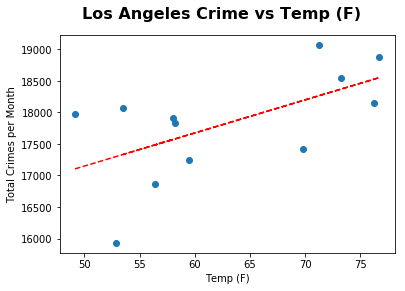

0.353
Equation of best-fit line:
Total Crimes per month = 14523.426 + 52.513(Temperature)

R-value = 0.594
R-sq = 0.353
35.3% of the variation of Total Crimes per month can be explained by Temp


In [31]:
# Set line - Los Angeles
(slope, intercept, rvalue, _, _) = linregress(temp_df_city_2015_month_avg['Los Angeles'], temp_df_city_2015_month_avg['Crime Los Angeles'])
exp_value = slope * temp_df_city_2015_month_avg['Los Angeles'] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Los Angeles Crime vs Temp (F)", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp (F)")
ax.set_ylabel("Total Crimes per Month")

ax.plot(temp_df_city_2015_month_avg['Los Angeles'], temp_df_city_2015_month_avg['Crime Los Angeles'], linewidth=0, marker='o')
ax.plot(temp_df_city_2015_month_avg['Los Angeles'], exp_value, '--r')

plt.show()

rsquared = round(rvalue**2, 3)
print(rsquared)
print('Equation of best-fit line:')
print(f'Total Crimes per month = {round(intercept,3)} + {round(slope,3)}(Temperature)')
print('')
print(f'R-value = {round(rvalue,3)}')
print(f'R-sq = {rsquared}')
print(f'{rsquared*100}% of the variation of Total Crimes per month can be explained by Temp')

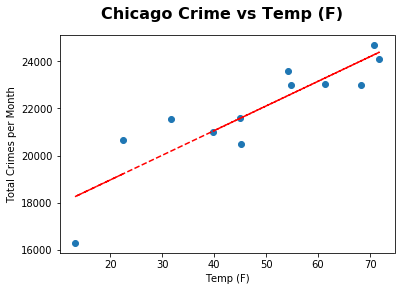

0.79
Equation of best-fit line:
Total Crimes per month = 16865.575 + 104.791(Temperature)

R-value = 0.889
R-sq = 0.79
79.0% of the variation of Total Crimes per month can be explained by Temp


In [32]:
# Set line
(slope, intercept, rvalue, _, _) = linregress(temp_df_city_2015_month_avg['Chicago'], temp_df_city_2015_month_avg['Crime Chicago'])
exp_value = slope * temp_df_city_2015_month_avg['Chicago'] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Chicago Crime vs Temp (F)", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp (F)")
ax.set_ylabel("Total Crimes per Month")

ax.plot(temp_df_city_2015_month_avg['Chicago'], temp_df_city_2015_month_avg['Crime Chicago'], linewidth=0, marker='o')
ax.plot(temp_df_city_2015_month_avg['Chicago'], exp_value, '--r')

plt.show()

rsquared = round(rvalue**2, 3)
print(rsquared)
print('Equation of best-fit line:')
print(f'Total Crimes per month = {round(intercept,3)} + {round(slope,3)}(Temperature)')
print('')
print(f'R-value = {round(rvalue,3)}')
print(f'R-sq = {rsquared}')
print(f'{rsquared*100}% of the variation of Total Crimes per month can be explained by Temp')

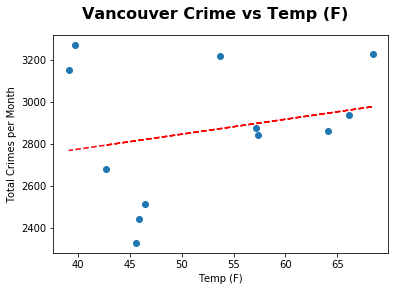

0.053
Equation of best-fit line:
Total Crimes per month = 2490.542 + 7.092(Temperature)

R-value = 0.231
R-sq = 0.053
5.3% of the variation of Total Crimes per month can be explained by Temp


In [33]:
# Set line
(slope, intercept, rvalue, _, _) = linregress(temp_df_city_2015_month_avg['Vancouver'], temp_df_city_2015_month_avg['Crime Vancouver'])
exp_value = slope * temp_df_city_2015_month_avg['Vancouver'] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Vancouver Crime vs Temp (F)", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp (F)")
ax.set_ylabel("Total Crimes per Month")

ax.plot(temp_df_city_2015_month_avg['Vancouver'], temp_df_city_2015_month_avg['Crime Vancouver'], linewidth=0, marker='o')
ax.plot(temp_df_city_2015_month_avg['Vancouver'], exp_value, '--r')

plt.show()

rsquared = round(rvalue**2, 3)
print(rsquared)
print('Equation of best-fit line:')
print(f'Total Crimes per month = {round(intercept,3)} + {round(slope,3)}(Temperature)')
print('')
print(f'R-value = {round(rvalue,3)}')
print(f'R-sq = {rsquared}')
print(f'{rsquared*100}% of the variation of Total Crimes per month can be explained by Temp')

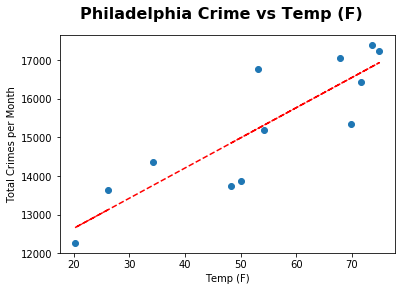

0.752
Equation of best-fit line:
Total Crimes per month = 11081.789 + 78.111(Temperature)

R-value = 0.867
R-sq = 0.752
75.2% of the variation of Total Crimes per month can be explained by Temp


In [34]:
# Set line - Philadelphia
(slope, intercept, rvalue, _, _) = linregress(temp_df_city_2015_month_avg['Philadelphia'], temp_df_city_2015_month_avg['Crime Philadelphia'])
exp_value = slope * temp_df_city_2015_month_avg['Philadelphia'] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Philadelphia Crime vs Temp (F)", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp (F)")
ax.set_ylabel("Total Crimes per Month")

ax.plot(temp_df_city_2015_month_avg['Philadelphia'], temp_df_city_2015_month_avg['Crime Philadelphia'], linewidth=0, marker='o')
ax.plot(temp_df_city_2015_month_avg['Philadelphia'], exp_value, '--r')

plt.show()

rsquared = round(rvalue**2, 3)
print(rsquared)
print('Equation of best-fit line:')
print(f'Total Crimes per month = {round(intercept,3)} + {round(slope,3)}(Temperature)')
print('')
print(f'R-value = {round(rvalue,3)}')
print(f'R-sq = {rsquared}')
print(f'{rsquared*100}% of the variation of Total Crimes per month can be explained by Temp')

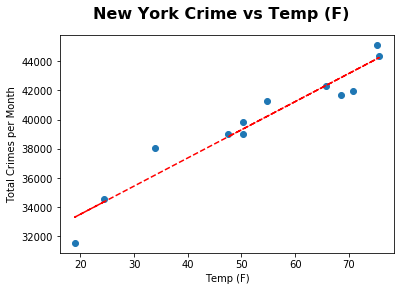

0.926
Equation of best-fit line:
Total Crimes per month = 29643.777 + 193.076(Temperature)

R-value = 0.962
R-sq = 0.926
92.6% of the variation of Total Crimes per month can be explained by Temp


In [43]:
# Set line - New York
(slope, intercept, rvalue, _, _) = linregress(temp_df_city_2015_month_avg['New York'], temp_df_city_2015_month_avg['Crime New York'])
exp_value = slope * temp_df_city_2015_month_avg['New York'] + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("New York Crime vs Temp (F)", fontsize=16, fontweight="bold")

ax.set_xlabel("Temp (F)")
ax.set_ylabel("Total Crimes per Month")

ax.plot(temp_df_city_2015_month_avg['New York'], temp_df_city_2015_month_avg['Crime New York'], linewidth=0, marker='o')
ax.plot(temp_df_city_2015_month_avg['New York'], exp_value, '--r')

plt.show()

rsquared = round(rvalue**2, 3)
print(rsquared)
print('Equation of best-fit line:')
print(f'Total Crimes per month = {round(intercept,3)} + {round(slope,3)}(Temperature)')
print('')
print(f'R-value = {round(rvalue,3)}')
print(f'R-sq = {rsquared}')
print(f'{round(rsquared*100,3)}% of the variation of Total Crimes per month can be explained by Temp')